In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# Import API key
from config import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/weather_df.csv"

# Range of latitudes and longitudes
lat = (-90, 90)
lng = (-180, 180)

# define url
#query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="
#api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}
query_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID="+ weather_api_key
  

# define count of pass throughs
count_one = 0
set_one = 1

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [6]:
response = requests.get(query_url + "&q=Jersey City").json()
#print(query_url)
print(json.dumps(response, indent=4))
print(response['clouds']['all'])
print(response['sys']['country'])
print(response['dt'])
print(response['main']['humidity'])
print(response['coord']['lat'])
print(response['coord']['lon'])
print(response['main']['temp_max'])
print(response['wind']['speed'])

{
    "coord": {
        "lon": -74.0776,
        "lat": 40.7282
    },
    "weather": [
        {
            "id": 501,
            "main": "Rain",
            "description": "moderate rain",
            "icon": "10n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 55.26,
        "feels_like": 54.66,
        "temp_min": 48.88,
        "temp_max": 59.5,
        "pressure": 1005,
        "humidity": 89
    },
    "visibility": 10000,
    "wind": {
        "speed": 18.99,
        "deg": 360,
        "gust": 32.01
    },
    "rain": {
        "1h": 2.37
    },
    "clouds": {
        "all": 100
    },
    "dt": 1645157401,
    "sys": {
        "type": 2,
        "id": 2008776,
        "country": "US",
        "sunrise": 1645098470,
        "sunset": 1645137185
    },
    "timezone": -18000,
    "id": 5099836,
    "name": "Jersey City",
    "cod": 200
}
100
US
1645157401
89
40.7282
-74.0776
59.5
18.99


In [9]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
# count_one = 0
# set_one = 1

# loops for creating dataframe columns
print("Beginning Data Retrieval")
print("--------------------------------------------")

for city in cities:
    if count_one == 51:
        count_one = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count_one} of Set {set_one} | {city}")    
    try:
        final_url = query_url + "&q=" + city
        print(final_url)
        response = requests.get(final_url).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")

Beginning Data Retrieval
--------------------------------------------
Processing Record 0 of Set 1 | donji komren
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=donji komren
City not found. Skipping...
Processing Record 0 of Set 1 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=bengkulu
Processing Record 1 of Set 1 | bengkulu
Processing Record 1 of Set 1 | grand gaube
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=grand gaube
Processing Record 2 of Set 1 | grand gaube
Processing Record 2 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=busselton
Processing Record 3 of Set 1 | busselton
Processing Record 3 of Set 1 | east london
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=east lon

Processing Record 35 of Set 1 | tasiilaq
Processing Record 35 of Set 1 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=yellowknife
Processing Record 36 of Set 1 | yellowknife
Processing Record 36 of Set 1 | celestun
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=celestun
Processing Record 37 of Set 1 | celestun
Processing Record 37 of Set 1 | victoria
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=victoria
Processing Record 38 of Set 1 | victoria
Processing Record 38 of Set 1 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=new norfolk
Processing Record 39 of Set 1 | new norfolk
Processing Record 39 of Set 1 | airai
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=airai
Processing Record 

Processing Record 23 of Set 2 | torbay
Processing Record 23 of Set 2 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=saint-philippe
Processing Record 24 of Set 2 | saint-philippe
Processing Record 24 of Set 2 | hobart
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=hobart
Processing Record 25 of Set 2 | hobart
Processing Record 25 of Set 2 | vaini
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=vaini
Processing Record 26 of Set 2 | vaini
Processing Record 26 of Set 2 | castro
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=castro
Processing Record 27 of Set 2 | castro
Processing Record 27 of Set 2 | puro
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=puro
Processing Record 28 of Set 2 | puro
Proces

Processing Record 10 of Set 3 | chara
Processing Record 10 of Set 3 | labuhan
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=labuhan
Processing Record 11 of Set 3 | labuhan
Processing Record 11 of Set 3 | cidreira
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=cidreira
Processing Record 12 of Set 3 | cidreira
Processing Record 12 of Set 3 | tres picos
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=tres picos
Processing Record 13 of Set 3 | tres picos
Processing Record 13 of Set 3 | dicabisagan
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=dicabisagan
Processing Record 14 of Set 3 | dicabisagan
Processing Record 14 of Set 3 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=tiksi
Processing Record 15 of Set

Processing Record 2 of Set 4 | lowestoft
Processing Record 2 of Set 4 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=nikolskoye
Processing Record 3 of Set 4 | nikolskoye
Processing Record 3 of Set 4 | tigil
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=tigil
Processing Record 4 of Set 4 | tigil
Processing Record 4 of Set 4 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=vaitupu
City not found. Skipping...
Processing Record 4 of Set 4 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=kavieng
Processing Record 5 of Set 4 | kavieng
Processing Record 5 of Set 4 | sorland
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=sorland
Processing Record 6 of Set 4 | sorland
Processing Record 6 of

Processing Record 39 of Set 4 | kruisfontein
Processing Record 39 of Set 4 | palmer
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=palmer
Processing Record 40 of Set 4 | palmer
Processing Record 40 of Set 4 | antalaha
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=antalaha
Processing Record 41 of Set 4 | antalaha
Processing Record 41 of Set 4 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=saldanha
Processing Record 42 of Set 4 | saldanha
Processing Record 42 of Set 4 | ivanivka
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=ivanivka
Processing Record 43 of Set 4 | ivanivka
Processing Record 43 of Set 4 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=arraial do cabo
Processing Record 

Processing Record 30 of Set 5 | miri
Processing Record 30 of Set 5 | huarmey
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=huarmey
Processing Record 31 of Set 5 | huarmey
Processing Record 31 of Set 5 | havelock
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=havelock
Processing Record 32 of Set 5 | havelock
Processing Record 32 of Set 5 | nalut
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=nalut
Processing Record 33 of Set 5 | nalut
Processing Record 33 of Set 5 | richards bay
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=richards bay
Processing Record 34 of Set 5 | richards bay
Processing Record 34 of Set 5 | yantai
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=yantai
Processing Record 35 of Set 5 | yantai

Processing Record 21 of Set 6 | husavik
Processing Record 21 of Set 6 | barra do garcas
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=barra do garcas
Processing Record 22 of Set 6 | barra do garcas
Processing Record 22 of Set 6 | nsanje
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=nsanje
Processing Record 23 of Set 6 | nsanje
Processing Record 23 of Set 6 | fresnillo
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=fresnillo
Processing Record 24 of Set 6 | fresnillo
Processing Record 24 of Set 6 | ust-tsilma
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=ust-tsilma
Processing Record 25 of Set 6 | ust-tsilma
Processing Record 25 of Set 6 | manta
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=manta
Processing Re

Processing Record 14 of Set 7 | ponta do sol
Processing Record 14 of Set 7 | lolua
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=lolua
City not found. Skipping...
Processing Record 14 of Set 7 | xiaoweizhai
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=xiaoweizhai
Processing Record 15 of Set 7 | xiaoweizhai
Processing Record 15 of Set 7 | verkhoyansk
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=verkhoyansk
Processing Record 16 of Set 7 | verkhoyansk
Processing Record 16 of Set 7 | alotau
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=alotau
City not found. Skipping...
Processing Record 16 of Set 7 | sal rei
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=sal rei
Processing Record 17 of Set 7 | sal rei
Proces

Processing Record 4 of Set 8 | nemuro
Processing Record 4 of Set 8 | sumbawa
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=sumbawa
City not found. Skipping...
Processing Record 4 of Set 8 | show low
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=show low
Processing Record 5 of Set 8 | show low
Processing Record 5 of Set 8 | san juan
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=san juan
Processing Record 6 of Set 8 | san juan
Processing Record 6 of Set 8 | gayeri
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=gayeri
Processing Record 7 of Set 8 | gayeri
Processing Record 7 of Set 8 | douentza
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=douentza
Processing Record 8 of Set 8 | douentza
Processing Record 8 of

Processing Record 43 of Set 8 | bentiu
Processing Record 43 of Set 8 | kawalu
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=kawalu
Processing Record 44 of Set 8 | kawalu
Processing Record 44 of Set 8 | rach gia
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=rach gia
Processing Record 45 of Set 8 | rach gia
Processing Record 45 of Set 8 | malanje
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=malanje
Processing Record 46 of Set 8 | malanje
Processing Record 46 of Set 8 | la palma
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=la palma
Processing Record 47 of Set 8 | la palma
Processing Record 47 of Set 8 | mizque
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=mizque
Processing Record 48 of Set 8 | mizque
Proces

Processing Record 31 of Set 9 | trairi
Processing Record 31 of Set 9 | tawnat
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=tawnat
City not found. Skipping...
Processing Record 31 of Set 9 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=lompoc
Processing Record 32 of Set 9 | lompoc
Processing Record 32 of Set 9 | lafiagi
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=lafiagi
Processing Record 33 of Set 9 | lafiagi
Processing Record 33 of Set 9 | tessalit
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=tessalit
Processing Record 34 of Set 9 | tessalit
Processing Record 34 of Set 9 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=sioux lookout
Processing Record 35 of Set 9 | sioux lookout
Pr

Processing Record 21 of Set 10 | buritizeiro
Processing Record 21 of Set 10 | balkhash
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=balkhash
Processing Record 22 of Set 10 | balkhash
Processing Record 22 of Set 10 | storsteinnes
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=storsteinnes
Processing Record 23 of Set 10 | storsteinnes
Processing Record 23 of Set 10 | sibu
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=sibu
Processing Record 24 of Set 10 | sibu
Processing Record 24 of Set 10 | aguimes
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=aguimes
Processing Record 25 of Set 10 | aguimes
Processing Record 25 of Set 10 | manzil tamim
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=manzil tamim
City not fou

Processing Record 12 of Set 11 | dhidhdhoo
Processing Record 12 of Set 11 | kupang
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=kupang
Processing Record 13 of Set 11 | kupang
Processing Record 13 of Set 11 | vila
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=vila
Processing Record 14 of Set 11 | vila
Processing Record 14 of Set 11 | agirish
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=agirish
Processing Record 15 of Set 11 | agirish
Processing Record 15 of Set 11 | matara
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=matara
Processing Record 16 of Set 11 | matara
Processing Record 16 of Set 11 | oksfjord
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=1664517f237c9a388309bc312dad02d2&q=oksfjord
Processing Record 17 of Set 11 | oksfjord
Proc

In [10]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

weather_dict

{'City': ['bengkulu',
  'grand gaube',
  'busselton',
  'east london',
  'atuona',
  'mahebourg',
  'klaksvik',
  'sola',
  'ushuaia',
  'georgetown',
  'hermanus',
  'berdigestyakh',
  'rikitea',
  'nicoya',
  'kulunda',
  'faanui',
  'muhos',
  'kaitangata',
  'marawi',
  'lubao',
  'butaritari',
  'barrow',
  'ust-kulom',
  'jamestown',
  'tiznit',
  'makasar',
  'punta arenas',
  'cabedelo',
  'bilibino',
  'kijang',
  'scottsbluff',
  'bredasdorp',
  'saskylakh',
  'severo-kurilsk',
  'tasiilaq',
  'yellowknife',
  'celestun',
  'victoria',
  'new norfolk',
  'airai',
  'albany',
  'faya',
  'la ronge',
  'lesnikovo',
  'xinzhi',
  'shache',
  'swellendam',
  'okhotsk',
  'port alfred',
  'anloga',
  'cape town',
  'codrington',
  'ca mau',
  'ribeira grande',
  'pevek',
  'bluff',
  'pouembout',
  'lebu',
  'hami',
  'mar del plata',
  'avarua',
  'along',
  'enshi',
  'chokurdakh',
  'saint george',
  'gat',
  'upernavik',
  'castelo branco',
  'puerto ayora',
  'mataura',
  'pr

In [14]:
# establish dataframe
weather_df = pd.DataFrame(weather_dict)
# show the top of the dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bengkulu,100,ID,1645157889,68,-3.8004,102.2655,81.97,0.67
1,grand gaube,100,MU,1645157889,76,-20.0064,57.6608,81.37,8.01
2,busselton,7,AU,1645157890,33,-33.6500,115.3333,96.04,6.35
3,east london,75,ZA,1645157862,100,-33.0153,27.9116,63.54,2.30
4,atuona,7,PF,1645157636,74,-9.8000,-139.0333,79.00,18.90


In [15]:
# output data to csv
weather_df.to_csv=output_data_file

In [16]:
weather_dataframe.count()

City          539
Cloudiness    539
Country       539
Date          539
Humidity      539
Lat           539
Lng           539
Max Temp      539
Wind Speed    539
dtype: int64

In [17]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bengkulu,100,ID,1645157889,68,-3.8004,102.2655,81.97,0.67
1,grand gaube,100,MU,1645157889,76,-20.0064,57.6608,81.37,8.01
2,busselton,7,AU,1645157890,33,-33.6500,115.3333,96.04,6.35
3,east london,75,ZA,1645157862,100,-33.0153,27.9116,63.54,2.30
4,atuona,7,PF,1645157636,74,-9.8000,-139.0333,79.00,18.90


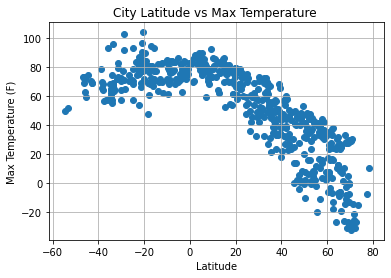

In [21]:

# Create a scatter plot for latitude vs max temperature.
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"City Latitude vs Max Temperature ")
plt.grid()
plt.savefig("./Images/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()

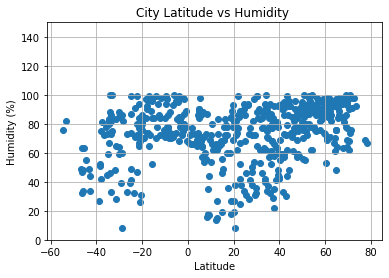

In [23]:
# Create a scatter plot for latitude vs humidity.
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ')
plt.ylim(0, 150)
plt.grid()
plt.savefig("./Images/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

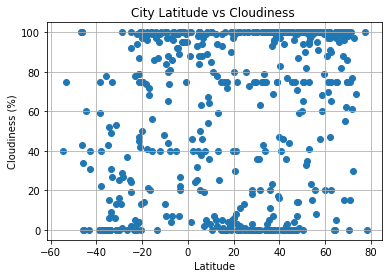

In [25]:
# Create a scatter plot for latitude vs cloudiness.
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ')
plt.grid()
plt.savefig("./Images/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

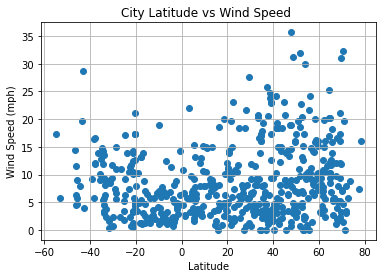

In [26]:
# Create a scatter plot for latitude vs wind speed.
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ')
plt.grid()
plt.savefig("./Images/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

In [35]:
# Create a function to create linear regression plots.
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    #today = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} ")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.savefig(f"./Images/{hemisphere}_{x_label}_vs_{y_label}.png", bbox_inches="tight")
    return plt.plot(x_values,regress_values,"r-")

# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere_weather_df = weather_df.loc[weather_df["Lat"] < 0]

The r-squared is: 0.7497958343168583


NameError: name 'st' is not defined

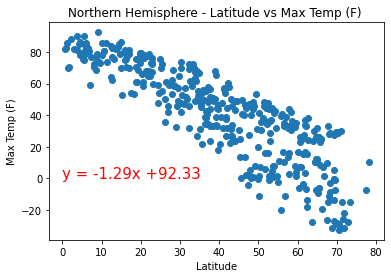

In [36]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemisphere_weather_df['Lat']
y_values = northern_hemisphere_weather_df['Max Temp']
createLinearRegressionPlot(x_values, y_values, "Latitude", "Max Temp (F)", "Northern",(0, 0))